In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

folder = '/content/drive/MyDrive/Lav_Pathak/'
fear_greed_file = folder + 'fear_greed_index.csv'
trader_file = folder + 'historical_data.csv'


In [ ]:
import pandas as pd

fear_greed = pd.read_csv(fear_greed_file)
traders = pd.read_csv(trader_file)


In [ ]:
print(fear_greed.head())
print(traders.head())
print(fear_greed.info())
print(traders.info())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [ ]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [ ]:
traders['timestamp ist'] = pd.to_datetime(traders['timestamp ist'], format='%d-%m-%Y %H:%M')

In [ ]:
traders['date'] = traders['timestamp ist'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

In [ ]:
merged = pd.merge(traders, fear_greed[['date', 'classification']], how='left', on='date')


In [ ]:
merged = merged.dropna(subset=['classification'])

In [ ]:
merged.columns = merged.columns.str.replace(' ', '_').str.lower()

In [ ]:
agg = merged.groupby('classification')['closed_pnl'].agg(['mean', 'count'])
print(agg)

                     mean  count
classification                  
Extreme Fear    34.537862  21400
Extreme Greed   67.892861  39992
Fear            54.290400  61837
Greed           42.743559  50303
Neutral         34.307718  37686


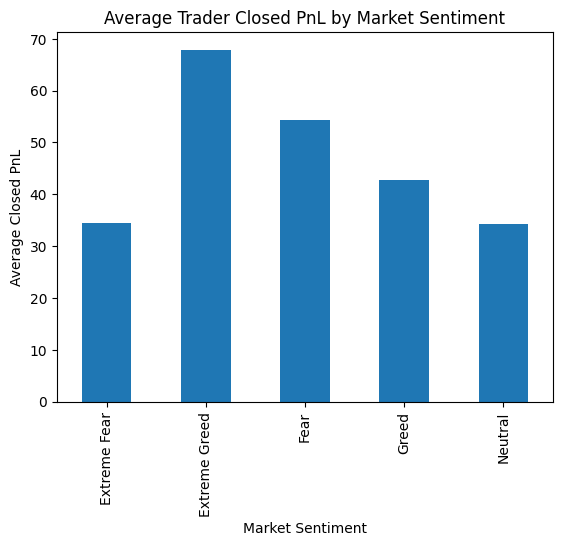

In [ ]:
import matplotlib.pyplot as plt

agg['mean'].plot(kind='bar')
plt.title('Average Trader Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()

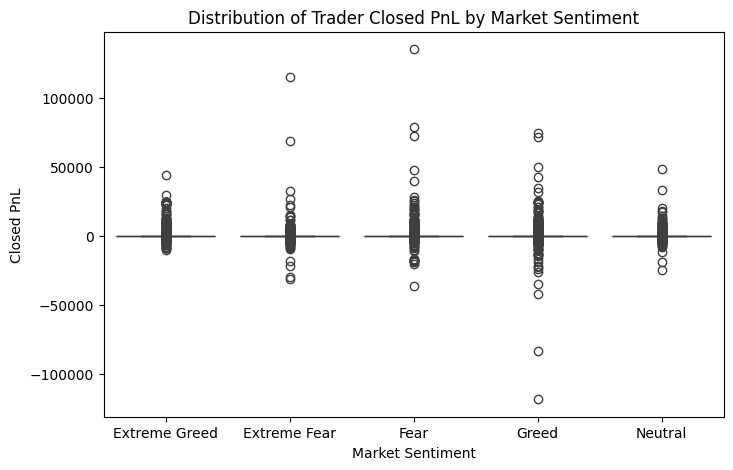

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="closed_pnl", data=merged)
plt.title("Distribution of Trader Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

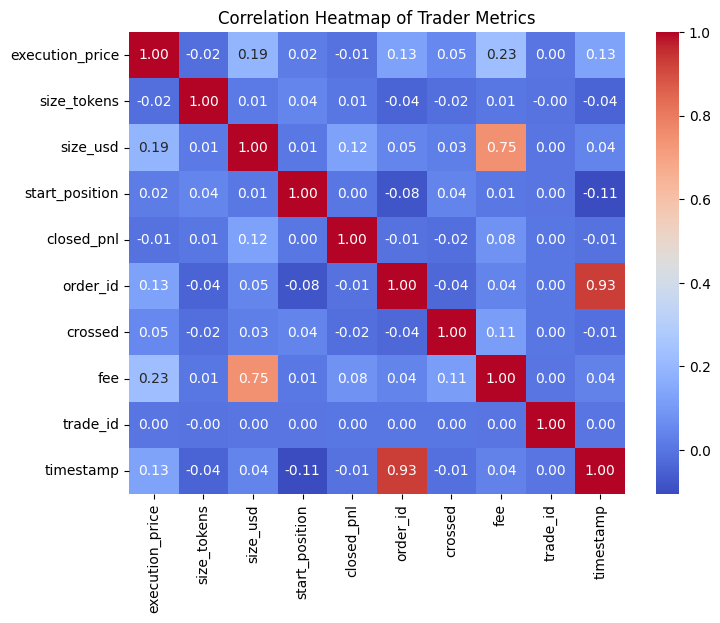

In [29]:
corr = merged.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Trader Metrics")
plt.show()

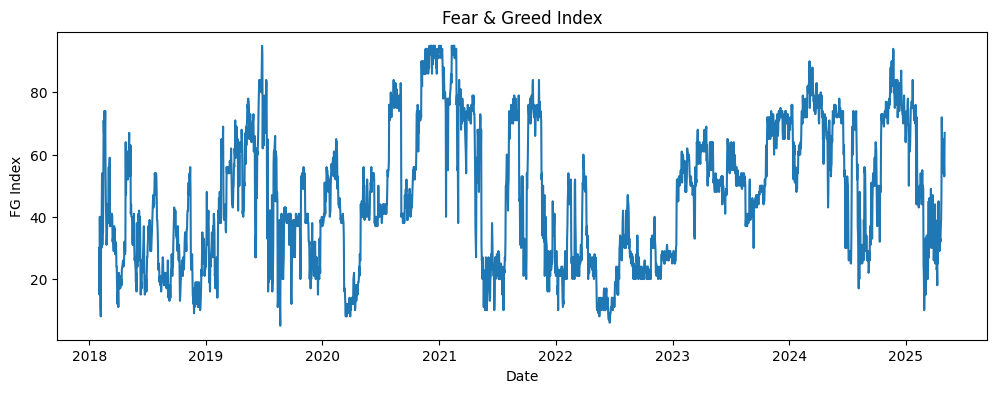

In [35]:
import matplotlib.pyplot as plt

# Fear & Greed
plt.figure(figsize=(12,4))
plt.plot(fear_greed['date'], fear_greed['value'])
plt.title("Fear & Greed Index")
plt.xlabel("Date"); plt.ylabel("FG Index")
plt.show()